# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations:

Python script used to analyis the following:

Randomly selects at least 500 unique (non-repeat) cities based on latitude and longitude.

Performs a weather check on each of the cities using a series of successive API calls.

Cloudiness and humidity do not show a strong correlation to latitude.

There is no strong relationship between latitude and cloudiness.

Wind speed tends to generally be betweeen 0 and 15 mph regardless of latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_keys = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_keys

In [13]:
# Create empty lists to append the API data into lists 
city_name = []
country = []
date = []
lat = []
lng = []
max_temp = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
# Try statement to append calls where value is found 
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")   
# Increase counter by one 
        record= record + 1
# Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
# If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Vaini
Processing Record 2 | North Bend
City not found. Skipping...
Processing Record 3 | Fare
Processing Record 4 | Hasaki
Processing Record 5 | Khatanga
Processing Record 6 | Clyde River
Processing Record 7 | Chuy
Processing Record 8 | Jamestown
City not found. Skipping...
Processing Record 9 | Mayo
Processing Record 10 | Ahipara
Processing Record 11 | Qaanaaq
Processing Record 12 | Lircay
Processing Record 13 | Bluff
Processing Record 14 | Busselton
Processing Record 15 | Gallup
Processing Record 16 | Mar del Plata
Processing Record 17 | Northam
Processing Record 18 | Yatou
Processing Record 19 | Sorland
Processing Record 20 | Hermanus
Processing Record 21 | East London
Processing Record 22 | Araouane
Processing Record 23 | Santa Vitoria
Processing Record 24 | Surovikino
Processing Record 25 | Hilo
Processing Record 26 | Skibbereen
Processing Record 27 | Alihe
Processing Record 28 | Komsomolskiy
Processing

Processing Record 225 | Fortuna
Processing Record 226 | Tiznit
Processing Record 227 | Kavieng
Processing Record 228 | Port Lincoln
Processing Record 229 | Huarmey
Processing Record 230 | Axim
Processing Record 231 | Kapit
Processing Record 232 | Ambon
Processing Record 233 | Acapulco
City not found. Skipping...
Processing Record 234 | Dongying
Processing Record 235 | Changji
Processing Record 236 | Bilibino
Processing Record 237 | Santiago del Estero
Processing Record 238 | Brookhaven
Processing Record 239 | Sinop
Processing Record 240 | Yar-Sale
City not found. Skipping...
Processing Record 241 | Itapirapua
Processing Record 242 | Constitucion
City not found. Skipping...
Processing Record 243 | Narsaq
Processing Record 244 | Broome
Processing Record 245 | Airai
Processing Record 246 | Leningradskiy
Processing Record 247 | San Quintin
Processing Record 248 | Alta Floresta
Processing Record 249 | Aklavik
City not found. Skipping...
Processing Record 250 | Valdivia
Processing Record 251

Processing Record 449 | Parrita
Processing Record 450 | Laguna
Processing Record 451 | Bracknell
Processing Record 452 | Zyryanka
Processing Record 453 | Havelock
Processing Record 454 | Karratha
Processing Record 455 | Camden
City not found. Skipping...
City not found. Skipping...
Processing Record 456 | Mabaruma
Processing Record 457 | Xinzhou
Processing Record 458 | Gambela
Processing Record 459 | Sri Aman
Processing Record 460 | Epe
Processing Record 461 | Chingirlau
Processing Record 462 | Zhoucun
Processing Record 463 | Marienburg
Processing Record 464 | Minden
Processing Record 465 | Den Helder
Processing Record 466 | Byron Bay
Processing Record 467 | Adrar
Processing Record 468 | Pauini
Processing Record 469 | Agnibilekrou
City not found. Skipping...
Processing Record 470 | Mirnyy
Processing Record 471 | Lichuan
Processing Record 472 | Basco
Processing Record 473 | Sibu
Processing Record 474 | Arlit
Processing Record 475 | Qandala
Processing Record 476 | Mucuri
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          525
Cloudiness    525
Country       525
Date          525
Humidity      525
Lat           525
Lng           525
Max Temp      525
Wind Speed    525
dtype: int64

In [6]:
weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City", "Cloudiness","Country","Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint-Augustin,75,CA,1561617424,88,45.63,-73.98,69.01,3.36
1,Ixtapa,90,MX,1561617427,74,20.71,-105.21,84.00,3.36
2,Port Hardy,40,CA,1561617736,93,50.70,-127.42,53.60,5.66
3,Albany,90,US,1561617275,100,42.65,-73.75,66.99,4.27
4,Port Alfred,0,ZA,1561617274,82,-33.59,26.89,57.99,3.00


In [7]:
weather_df.to_csv("Output_weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

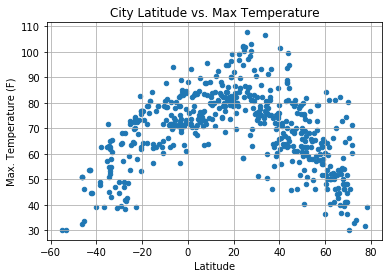

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_LatVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

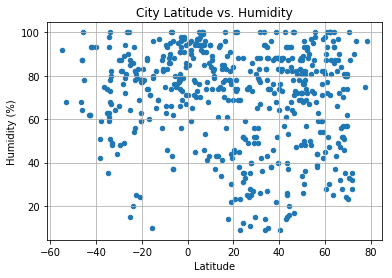

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_LatVsHum.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

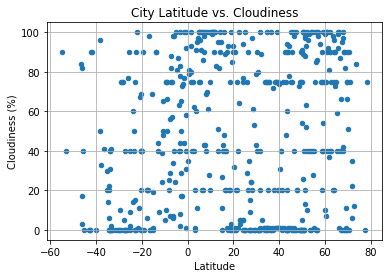

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_LatVsCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

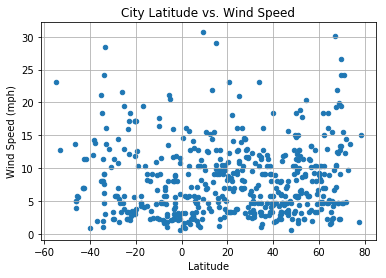

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_LatVsWind.png")

# Show plot
plt.show()